In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


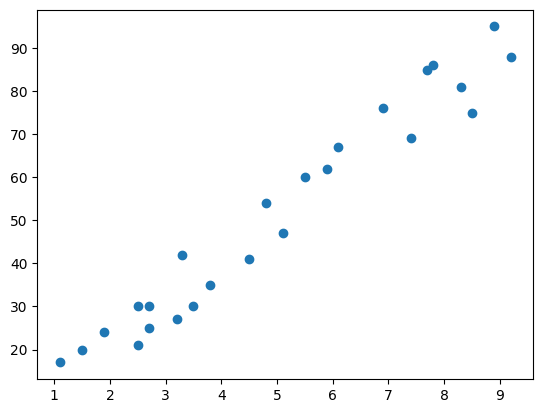

In [2]:
dataset = pd.read_csv('studentscores.csv')
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.show()

In [3]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,1].values

In [4]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


Y = Mx + c

In [5]:
class Model():
  def __init__(self, learning_rate, iterations):
    self.learning_rate = learning_rate
    self.iterations = iterations

  def predict(self, X):
    return X.dot(self.slope) + self.const

  def fit(self, X, Y):
    self.m, self.n = X.shape
    self.slope = np.zeros(self.n)
    self.const = 0
    self.X = X
    self.Y = Y

    for i in range(self.iterations):
      self.update_weights()
    return self

  def update_weights(self):
    Y_pred = self.predict(self.X)
    dW = - (2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
    db = - 2 * np.sum(self.Y - Y_pred) / self.m

    self.slope -= self.learning_rate * dW
    self.const -= self.learning_rate * db
    return self

In [6]:
model = Model(learning_rate=0.01, iterations=1000)
model.fit(X, Y)

In [7]:
Y_pred = model.predict(X)
print(Y_pred)

[26.91171724 52.33687281 33.75695143 85.58515317 36.69062323 17.13281125
 92.43038736 56.24843521 83.62937197 28.86749844 77.76202838 60.1599976
 46.46952922 34.73484203 13.22124886 89.49671557 26.91171724 21.04437365
 62.1157788  74.82835658 28.86749844 49.40320102 39.62429503 69.93890359
 78.73991898]


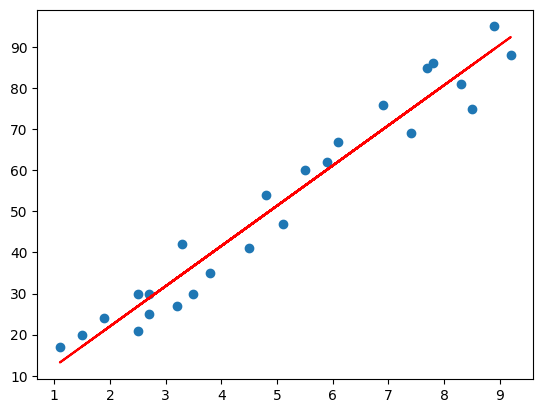

In [8]:
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.plot(X, Y_pred, color='red')
plt.show()

In [9]:
print(model.slope, model.const)

[9.77890599] 2.4644522714760995


In [10]:
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation
class LinearRegression:
  def __init__(self):
    self.parameters = {}

  def forward_propagation(self, train_input):
    m = self.parameters['m']
    c = self.parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

  def cost_function(self, predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2)
    return cost

  def backward_propagation(self, train_input, train_output, predictions):
    derivatives = {}
    df = (predictions - train_output)
    dm = 2 * np.mean(np.multiply(train_input, df))
    dc = 2 * np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

  def update_parameters(self, derivatives, learning_rate):
    self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
    self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

  def train(self, train_input, train_output, learning_rate, iters):
    self.parameters['m'] = np.random.uniform(0, 1) * -1
    self.parameters['c'] = np.random.uniform(0, 1) * -1

    self.loss = []

    fig, ax = plt.subplots()
    x_vals = np.linspace(min(train_input), max(train_input), 100)
    line, = ax.plot(x_vals,self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
    ax.scatter(train_input, train_output, marker='o', color='green', label='Training Date')

    ax.set_ylim(0, max(train_output) + 1)

    def update(frame):
      predictions = self.forward_propagation(train_input)
      cost = self.cost_function(predictions, train_output)
      derivatives = self.backward_propagation(train_input, train_output, predictions)
      self.update_parameters(derivatives, learning_rate)
      line.set_ydata(self.parameters['m']*x_vals +self.parameters['c'])
      self.loss.append(cost)
      print("Iteration = {}, Loss = {}".format(frame + 1,cost))
      return line,

    ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
    ani.save('linear_regression_A.gif', writer='ffmpeg')

    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    return self.parameters, self.loss

Iteration = 1, Loss = 3357.4728045523816
Iteration = 1, Loss = 1398.5547245722023
Iteration = 1, Loss = 1142.8063758349188
Iteration = 1, Loss = 1106.5840086708445
Iteration = 2, Loss = 1098.6785587699037
Iteration = 3, Loss = 1094.4472160854639
Iteration = 4, Loss = 1090.7138791015338
Iteration = 5, Loss = 1087.0690317978106
Iteration = 6, Loss = 1083.459711274062
Iteration = 7, Loss = 1079.878907856353
Iteration = 8, Loss = 1076.3255356279028
Iteration = 9, Loss = 1072.7992735049486
Iteration = 10, Loss = 1069.299900354884
Iteration = 11, Loss = 1065.8272092971588
Iteration = 12, Loss = 1062.3809966481115
Iteration = 13, Loss = 1058.9610604858303
Iteration = 14, Loss = 1055.5672004549037
Iteration = 15, Loss = 1052.1992177310465
Iteration = 16, Loss = 1048.8569150064034
Iteration = 17, Loss = 1045.540096477598
Iteration = 18, Loss = 1042.2485678342118
Iteration = 19, Loss = 1038.9821362473947
Iteration = 20, Loss = 1035.7406103585654
Iteration = 21, Loss = 1032.523800268204
Iteration

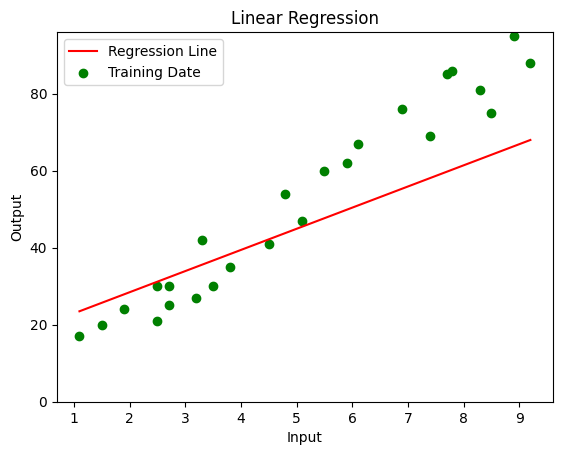

In [11]:
model = LinearRegression()
parameters, loss = model.train(X, Y, learning_rate=0.01, iters=100)

In [12]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [13]:
print(X)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [16]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)
print(y_pred)

[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [18]:
for i, (pred, actual) in enumerate(zip(y_pred, Y_test)):
  print(f"Sample {i+1}: Predicted: {pred:.2f}, Actual: {actual:.2f}")

Sample 1: Predicted: 103901.90, Actual: 103282.38
Sample 2: Predicted: 132763.06, Actual: 144259.40
Sample 3: Predicted: 133567.90, Actual: 146121.95
Sample 4: Predicted: 72911.79, Actual: 77798.83
Sample 5: Predicted: 179627.93, Actual: 191050.39
Sample 6: Predicted: 115166.65, Actual: 105008.31
Sample 7: Predicted: 67113.58, Actual: 81229.06
Sample 8: Predicted: 98154.81, Actual: 97483.56
Sample 9: Predicted: 114756.12, Actual: 110352.25
Sample 10: Predicted: 169064.01, Actual: 166187.94


In [19]:
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

Coefficients: [0.77884104 0.0293919  0.03471025]
Intercept: 42989.00816508669


Y = 0.77884104*x1 + 0.0293919*x2 + 0.03471025*x3 + 42989.00816508669

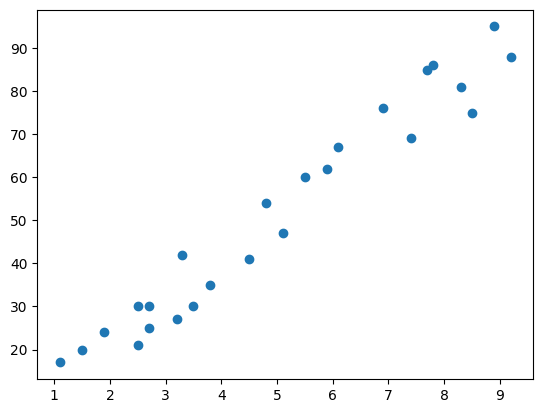

In [20]:
dataset = pd.read_csv('studentscores.csv')
plt.scatter(dataset['Hours'], dataset['Scores'])
plt.show()
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
print(X_poly)

[[  1.      2.5     6.25   15.625]
 [  1.      5.1    26.01  132.651]
 [  1.      3.2    10.24   32.768]
 [  1.      8.5    72.25  614.125]
 [  1.      3.5    12.25   42.875]
 [  1.      1.5     2.25    3.375]
 [  1.      9.2    84.64  778.688]
 [  1.      5.5    30.25  166.375]
 [  1.      8.3    68.89  571.787]
 [  1.      2.7     7.29   19.683]
 [  1.      7.7    59.29  456.533]
 [  1.      5.9    34.81  205.379]
 [  1.      4.5    20.25   91.125]
 [  1.      3.3    10.89   35.937]
 [  1.      1.1     1.21    1.331]
 [  1.      8.9    79.21  704.969]
 [  1.      2.5     6.25   15.625]
 [  1.      1.9     3.61    6.859]
 [  1.      6.1    37.21  226.981]
 [  1.      7.4    54.76  405.224]
 [  1.      2.7     7.29   19.683]
 [  1.      4.8    23.04  110.592]
 [  1.      3.8    14.44   54.872]
 [  1.      6.9    47.61  328.509]
 [  1.      7.8    60.84  474.552]]


In [23]:
model = LinearRegression()
model.fit(X_poly, Y)

LinearRegression()

In [24]:
print(model.coef_)
print(model.intercept_)

[ 0.         -3.79705913  2.99874775 -0.19257785]
19.317706990502344


In [25]:
y_pred = model.predict(X_poly)
print(y_pred)

[25.55820366 52.4044897  31.56390366 85.43535572 34.50588455 19.71935048
 88.24070983 57.10586101 84.27233622 27.13600857 79.9579611  61.75002055
 45.40692604 32.52310457 18.5131056  87.29327399 25.55820366 21.60788253
 64.02753655 77.39372855 27.13600857 48.88540147 37.62366789 72.62482165
 80.75625387]


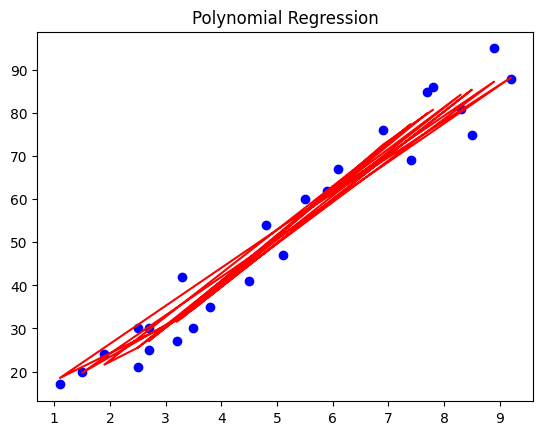

In [26]:
plt.scatter(X, Y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Polynomial Regression')
plt.show()